In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
from pandas_summary import DataFrameSummary
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence

from zipfile import ZipFile
from sklearn.linear_model import LinearRegression

%matplotlib inline
pd.set_option('display.max_columns', 53)

/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Galvanize Case Study on Regression 

This project would like to predict price given the sales data.

Using the training data, build a model that predicts which user_id's will make a purchase in the future.

Apoorv Chaudhary
Aymeric Flaisler
Zhifan Sang 

2/10/2017


In [50]:
def _load_data():
    pass

In [51]:
train = pd.read_csv("../data/Train.csv")
test = pd.read_csv("../data/test.csv")

/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
print("training set: " + str(train.shape) + " "+str(len(train['SalesID'].unique()))+" SalesID") 
print("testing set: " + str(test.shape)  +" "+ str(len(test['SalesID'].unique()))+" SalesID" )
missing = train.isnull().any().any() or train.isnull().any().any()
print("There is no missing values in the datasets" if not missing else "There are missing values in the dataset")

training set: (401125, 53) 401125 SalesID
testing set: (11573, 52) 11573 SalesID
There are missing values in the dataset


In [56]:
dfs = DataFrameSummary(train)
train_summary = dfs.columns_stats
test_summary =  DataFrameSummary(test).columns_stats
train_summary

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
counts,401125,401125,401125,401125,401125,380989,401125,142765,69639,401125,401125,401125,263934,56908,71919,190350,401125,401125,401125,401125,104361,400800,192077,79134,148606,79134,183230,79134,25219,25219,25219,25219,320570,25219,104137,25230,25219,94718,213952,43458,43362,43362,99153,99872,99218,99288,99218,99153,78672,79833,79834,69411,69369
uniques,401125,899,341027,5218,5,30,72,15152,3,3919,4999,1950,175,128,139,6,74,53,6,6,4,6,2,4,3,2,8,2,2,6,3,2,12,2,4,2,3,17,3,2,2,3,2,19,29,3,3,3,2,10,7,4,5
missing,0,0,0,0,0,20136,0,258360,331486,0,0,0,137191,344217,329206,210775,0,0,0,0,296764,325,209048,321991,252519,321991,217895,321991,375906,375906,375906,375906,80555,375906,296988,375895,375906,306407,187173,357667,357763,357763,301972,301253,301907,301837,301907,301972,322453,321292,321291,331714,331756
missing_perc,0%,0%,0%,0%,0%,5.02%,0%,64.41%,82.64%,0%,0%,0%,34.20%,85.81%,82.07%,52.55%,0%,0%,0%,0%,73.98%,0.08%,52.12%,80.27%,62.95%,80.27%,54.32%,80.27%,93.71%,93.71%,93.71%,93.71%,20.08%,93.71%,74.04%,93.71%,93.71%,76.39%,46.66%,89.17%,89.19%,89.19%,75.28%,75.10%,75.27%,75.25%,75.27%,75.28%,80.39%,80.10%,80.10%,82.70%,82.71%
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,bool,categorical,categorical,bool,categorical,bool,bool,categorical,categorical,bool,categorical,bool,categorical,bool,categorical,categorical,categorical,bool,bool,categorical,bool,categorical,categorical,categorical,categorical,categorical,bool,categorical,categorical,categorical,categorical


In [6]:
train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
keep_cols_test = ["MachineID","ModelID","datasource","YearMade","MachineHoursCurrentMeter","fiBaseModel","fiSecondaryDesc","state","ProductGroup","Enclosure","Ride_Control","Stick","Hydraulics"]
keep_cols = ["MachineID","ModelID","datasource","YearMade","MachineHoursCurrentMeter","SalePrice","fiBaseModel","fiSecondaryDesc","state","ProductGroup","Enclosure","Ride_Control","Stick","Hydraulics"]

In [94]:
def p2f(x):
    return float(x.strip('%'))

In [72]:
train_keep_stat = DataFrameSummary(train[keep_cols]).columns_stats
test_keep_stat = DataFrameSummary(test[keep_cols_test]).columns_stats

In [97]:
missing_summary = pd.concat([train_keep_stat.ix[3].apply(p2f).rename("missing_train"), test_keep_stat.ix[3].apply(p2f).rename("missing_test")], axis=1)

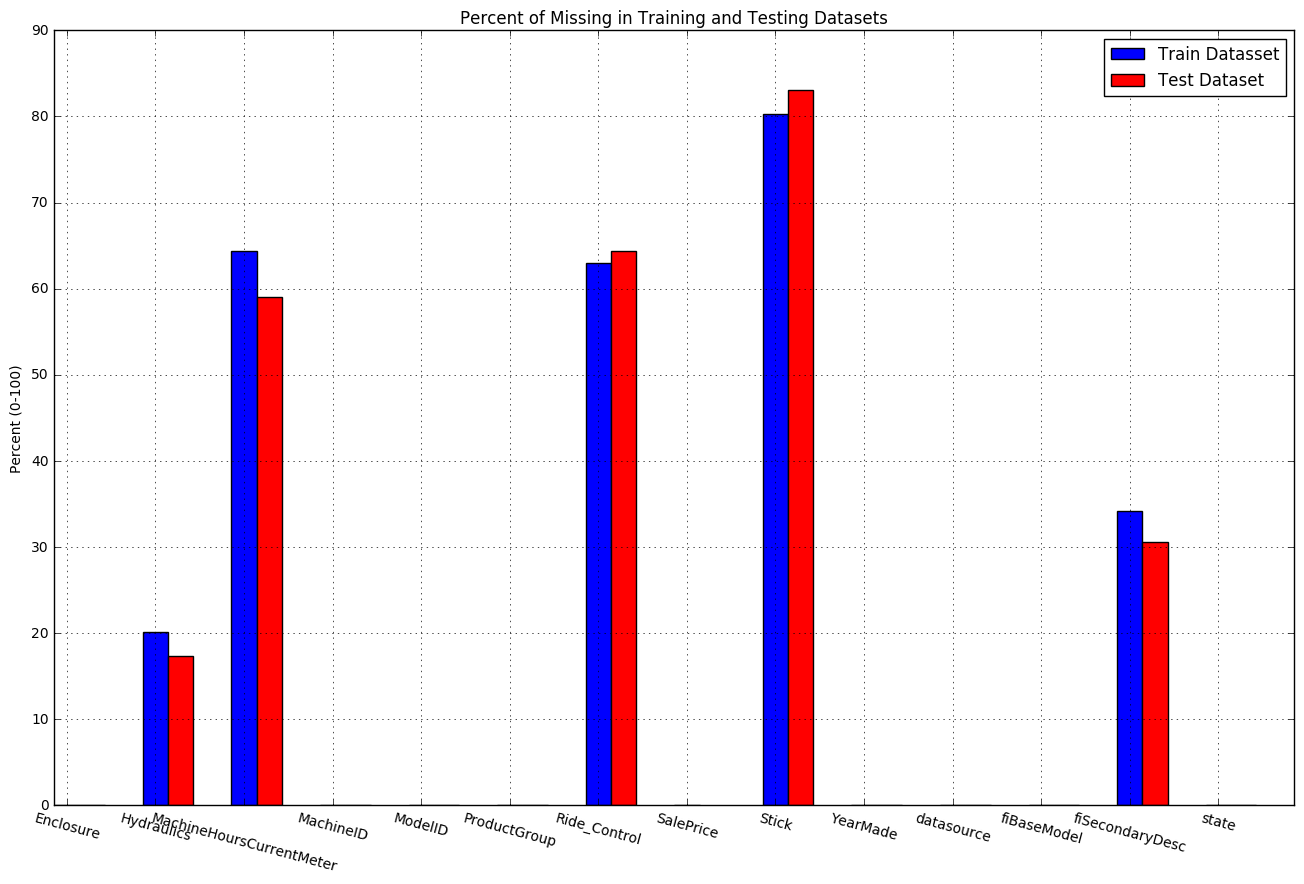

In [103]:
# Generate Barplot of comparing activity type pervalence in train/test sets. 
plt.figure(figsize=(16,10))
n_classes = 14
plt.bar(3.5*np.arange(n_classes), missing_summary['missing_train'], width=1)
plt.bar(3.5*np.arange(n_classes) + 1, missing_summary['missing_test'], width=1, color='r')
plt.xticks(3.5*np.arange(n_classes) + 0.5, missing_summary.index, rotation=-15)
plt.title('Percent of Missing in Training and Testing Datasets')
plt.ylabel('Percent (0-100)')
plt.xlim([0, 3.5*n_classes])
plt.legend(['Train Datasset', 'Test Dataset'])
plt.grid(True)
plt.show()

In [104]:
#model

In [27]:
def load_data(filename):
    '''
    - input: zipfile location containing the data
    - output: pandas dataframe with subset of data with the following features:
        MachineID
        ModelID
        datasource
        YearMade
        c
        Saleprice
        fiBaseModel
        fiSecondaryDesc
        State
        ProductGroup
        Enclosure
        Ride_Control
        Stick
        Hydraulics
    - how it works: unzip the data, load data from zip file to a pandas df,
    select the features previously identify during EDA, remove missing data and outliers
    - DtypeWarning: Columns (13,39,40,41) have mixed types but we won't use them
    '''
    zf = ZipFile(filename + '.zip')
    df = pd.read_csv(filename + '.csv')
    # selecting specific features we will work with
    keep_cols = [ "datasource", "YearMade", "MachineHoursCurrentMeter", "SalePrice",
                  "ProductGroup", "Enclosure", "Ride_Control", "Stick", "Hydraulics"]
    df = df[keep_cols]
    # removing weird year - will focus on those later on if we have time
    df = df.ix[df['YearMade'] > 1900]
    # save df with missing data

    return df
    #, df_year_missing, df_machineHour_missing

In [28]:
df = load_data("../data/train")
# cats  =[ 'datasource',
#          'fiBaseModel','fiSecondaryDesc', 'state', 'ProductGroup', 'Enclosure', 'Ride_Control',
#        'Stick', 'Hydraulics']
cats  =[ 'datasource', 'ProductGroup', 'Enclosure', 'Ride_Control',
       'Stick', 'Hydraulics']
for cat in cats:
    tmp = pd.get_dummies(df.pop(cat))
    df = pd.concat([df, tmp], axis = 1)
#     df[cat] = df[cat].astype('category').cat.codes

/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [29]:
#impute values for Machine hours
df_usage=df[['MachineHoursCurrentMeter','YearMade']]

df_usage_vals = df_usage.dropna()

mask_missing = df_usage.isnull().any(axis=1)
df_usage_missing = df_usage[mask_missing]

y_impute = df_usage_vals['MachineHoursCurrentMeter']
x_impute = df_usage_vals.drop(['MachineHoursCurrentMeter'], axis = 1)

#create a Random Forest to fill in machine hour nans
rf_usage = RandomForestRegressor()
rf_usage.fit(x_impute, y_impute)
preds_usage  = rf_usage.predict(df_usage_missing.drop(['MachineHoursCurrentMeter'], axis = 1))

#smoosh them back together
df_usage_missing['MachineHoursCurrentMeter']=pd.Series(preds_usage, index=df_usage_missing.index)
df_usage_total= pd.concat([df_usage_missing, df_usage_vals], axis=0)


/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
df['MachineHoursCurrentMeter']  =  df_usage_total['MachineHoursCurrentMeter']

In [31]:
df_usage_total

,MachineHoursCurrentMeter,YearMade
23974,2501.469404,2006
23975,3268.356195,2005
23976,3023.912932,2000
23977,3023.912932,2000
23978,2501.469404,2006
23979,2501.469404,2006
23980,2501.469404,2006
23981,3023.912932,2000
23982,3023.912932,2000
23983,3023.912932,2000


In [32]:
df

,YearMade,MachineHoursCurrentMeter,SalePrice,121,132,136,149,172,BL,MG,SSL,TEX,TTT,WL,EROPS,EROPS AC,EROPS w AC,NO ROPS,None or Unspecified,OROPS,No,None or Unspecified,Yes,Extended,Standard,2 Valve,3 Valve,4 Valve,Auxiliary,Base + 1 Function,Base + 2 Function,Base + 3 Function,Base + 4 Function,Base + 5 Function,Base + 6 Function,None or Unspecified,Standard
0,2004,68.000000,66000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1996,4640.000000,57000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001,2838.000000,10000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2001,3486.000000,38500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,722.000000,11000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2004,508.000000,26500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1993,11540.000000,21000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,2001,4883.000000,27000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2008,302.000000,21500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2004,1414.000000,24000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
y = np.array(df.pop('SalePrice').values)
X = np.array(df.values)
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=1)

In [35]:
#Random Forest Model
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
yhat = rf.predict(X_test)

rf_cv_mse_scores = cross_val_score(rf, X_test, y_test, scoring='mean_squared_error', cv=10)

rf_cv_mse = np.mean(np.abs(rf_cv_mse_scores))

/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-package

In [59]:
rf_cv_mse

277977944.46448147

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
mean_squared_error(y_test,yhat)

268666309.40243143

In [65]:
r2_score(y_test,yhat)

0.50937169062216703

In [66]:
r2_score(y_train,rf.predict(X_train))

0.60397647413349653

In [50]:
for i,k in zip(df.columns,rf.feature_importances_):
    print(i,k)

YearMade 0.164022984012
MachineHoursCurrentMeter 0.117722564754
121 0.00478186236716
132 0.0187436612586
136 0.00448090880949
149 0.004188564732
172 0.00755242181254
BL 0.0383221718569
MG 0.0443877655191
SSL 0.108299087702
TEX 0.00702380055539
TTT 0.0104321595032
WL 0.00213744833633
EROPS 0.00625708884946
EROPS AC 5.42233081098e-06
EROPS w AC 0.363108174912
NO ROPS 3.9089761151e-06
None or Unspecified 1.73746134841e-06
OROPS 0.00254801952373
No 0.0480417896355
None or Unspecified 0.00540020609757
Yes 0.00662163096984
Extended 0.000373308208396
Standard 0.000235114626984
2 Valve 0.00491382163532
3 Valve 0.00197562397259
4 Valve 0.00452803231109
Auxiliary 0.0152362524664
Base + 1 Function 0.00373541635871
Base + 2 Function 0.000161705562769
Base + 3 Function 0.000408828702006
Base + 4 Function 0.000100758925665
Base + 5 Function 4.55325354753e-05
Base + 6 Function 3.90225082606e-05
None or Unspecified 4.3554506994e-06
Standard 0.00415884676023


In [43]:
rf.feature_importances_

array([  1.64022984e-01,   1.17722565e-01,   4.78186237e-03,
         1.87436613e-02,   4.48090881e-03,   4.18856473e-03,
         7.55242181e-03,   3.83221719e-02,   4.43877655e-02,
         1.08299088e-01,   7.02380056e-03,   1.04321595e-02,
         2.13744834e-03,   6.25708885e-03,   5.42233081e-06,
         3.63108175e-01,   3.90897612e-06,   1.73746135e-06,
         2.54801952e-03,   4.80417896e-02,   5.40020610e-03,
         6.62163097e-03,   3.73308208e-04,   2.35114627e-04,
         4.91382164e-03,   1.97562397e-03,   4.52803231e-03,
         1.52362525e-02,   3.73541636e-03,   1.61705563e-04,
         4.08828702e-04,   1.00758926e-04,   4.55325355e-05,
         3.90225083e-05,   4.35545070e-06,   4.15884676e-03])

In [42]:
rf.fit(X_train,y_train)
rf_hat = rf.predict(X_test)
rf_preds = np.savetxt('rf_preds.csv', rf_hat)

In [58]:
X_train.shape


(290352, 36)

In [40]:
def score(predictions):
    log_diff = np.log(predictions+1) - np.log(self.target+1)
    return np.sqrt(np.mean(log_diff**2))

In [57]:
pd.DataFrame({"feature":df.columns,"importance":rf.feature_importances_}).sort('importance',ascending=False)

/Users/codehi/Documents/software/Anaconda/anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature,importance
15,EROPS w AC,0.363108
0,YearMade,0.164023
1,MachineHoursCurrentMeter,0.117723
9,SSL,0.108299
19,No,0.048042
8,MG,0.044388
7,BL,0.038322
3,132,0.018744
27,Auxiliary,0.015236
11,TTT,0.010432


In [ ]:
rf_hat